37.0


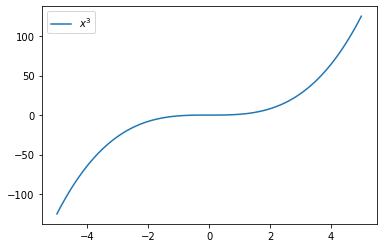

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def x3(x):
    return np.power(x, 3)

def calc_change_rate(f, a, h):
    return (f(a+h) - f(a))/h

x = np.linspace(-5, 5, 100)
y = x3(x)
print(calc_change_rate(x3, 3, 1))
plt.plot(x,y, label="$x^3$")
plt.legend()
plt.show()

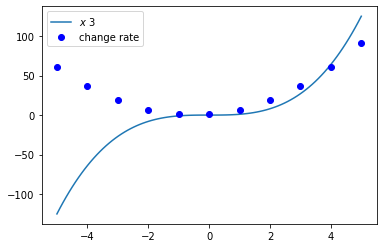

In [25]:
x = np.linspace(-5, 5, 100)

a = np.arange(-5, 5+1)
r = calc_change_rate(f=x3, a=a, h=1)

plt.plot(x, x3(x), label="$x~3$")
plt.plot(a, r, 'bo', label="change rate")
plt.legend()
plt.show()

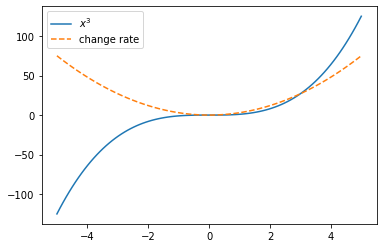

In [26]:
r = calc_change_rate(f=x3, a=x, h=0.0001)

plt.plot(x, x3(x), label="$x^3$")
plt.plot(x, r, linestyle="dashed", label="change rate")

plt.legend()
plt.show()

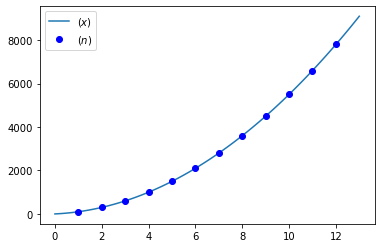

In [27]:
x = np.linspace(0, 13, 100)
n = np.arange(1, 13)

def s(t):
    return 50*t*(t+1)

plt.plot(x, s(x), label="$(x)$")
plt.plot(n, s(n), 'bo', label="$(n)$")
plt.legend()
plt.show()

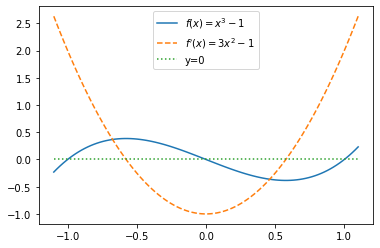

In [28]:
x = np.linspace(-1.1, 1.1, 100)

def f(x):
    return x**3 - x

def diff_f(x):
    return 3 * x**2 -1

def zero(x):
    return np.zeros(x.shape[0])

plt.plot(x, f(x), label="$f(x)=x^3 - 1$")
plt.plot(x, diff_f(x), linestyle="dashed", label="$f^{\prime}(x)=3x^{2} - 1$")
plt.plot(x, zero(x), linestyle="dotted", label="y=0")
plt.legend()
plt.show()

In [29]:
from scipy import optimize

optimize.minimize_scalar(f, bounds=(-1, 1))

     fun: -0.3849001794597505
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 15
     nit: 11
 success: True
       x: 0.5773502693888115

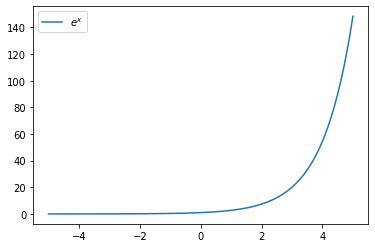

In [30]:
x = np.linspace(-5, 5, 100)

plt.plot(x, np.exp(x), label="$e^{x}$")
plt.legend()
plt.show()

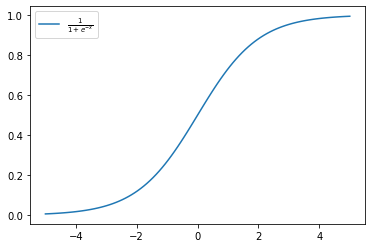

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid(x), label=r"$\frac{1}{1+e^{-x}}$")
plt.legend()
plt.show()

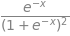

In [32]:
from sympy import var, exp, diff, init_printing

init_printing()
var("x")
f = 1 / (1+exp(-x))
diff(f, x)

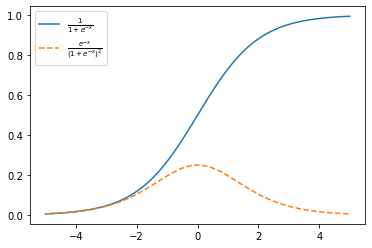

In [33]:
x = np.linspace(-5, 5, 100)

def diff_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

plt.plot(x, sigmoid(x), label=r"$\frac{1}{1+e^{-x}}$")
plt.plot(x, diff_sigmoid(x), linestyle="dashed", label=r"$\frac{e^{-x}}{(1+e^{-x})^{2}}$")
plt.legend()
plt.show()

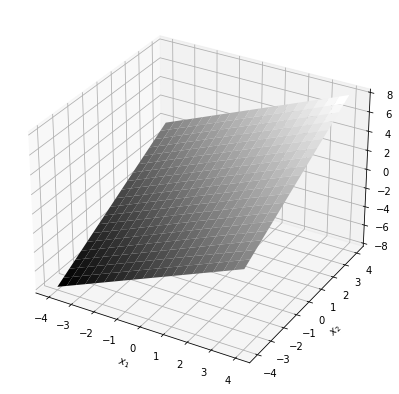

In [34]:
from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(-4, 4, 20)
x2 = np.linspace(-4, 4, 20)
x1, x2 = np.meshgrid(x1, x2)

def f(x1, x2):
    return (x1+x2)

z = f(x1, x2)
fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.plot_surface(x1, x2, z, cmap="gray")
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
plt.show()

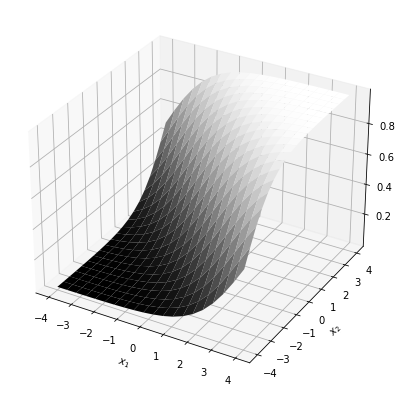

In [35]:
def sigmoid(x1, x2):
    return 1 / (1 + np.exp(-1 * (x1+x2)))

z = sigmoid(x1, x2)
fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.plot_surface(x1, x2, z, cmap="gray")
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
plt.show()

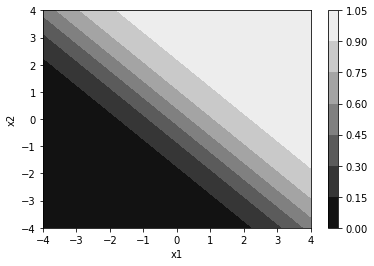

In [36]:
fig, ax = plt.subplots()
im = ax.contourf(x1, x2, z, cmap='gray')
plt.colorbar(im)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

In [37]:
var('x1, x2')
f = (1 + exp(-x1 - x2))
diff(f, x1)

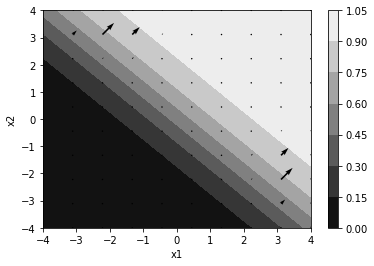

In [38]:
x1 = np.linspace(-4, 4, 10)
x2 = np.linspace(-4, 4, 10)
x1, x2 = np.meshgrid(x1, x2)

z = sigmoid(x1, x2)

def diff_sigmoid(x1, x2):
    return np.exp(-1 * (x1*x2)/((1+np.exp(-1*(x1+x2))))**2)

u = diff_sigmoid(x1, x2)
v = diff_sigmoid(x1, x2)

fig, ax = plt.subplots()
im = ax.contourf(x1, x2, z, cmap='gray')
plt.colorbar(im)

plt.quiver(x1, x2, u, v)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

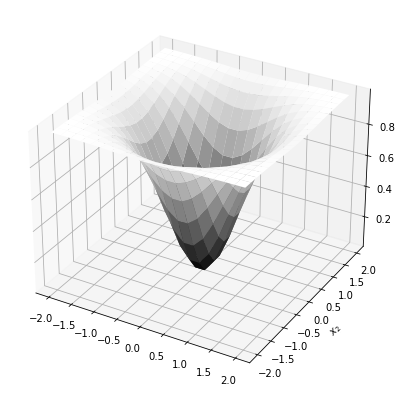

In [41]:
x1 = np.linspace(-2, 2, 20)
x2 = np.linspace(-2, 2, 20)
x1, x2 = np.meshgrid(x1, x2)

def cone(x1, x2):
    return 1 - np.exp(-(x1**2 + x2**2))

z = cone(x1, x2)
fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.plot_surface(x1, x2, z, cmap="gray")
ax.set_ylabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
plt.show()

In [42]:
var('x1, x2')
f = 1 - exp(-x1**2 - x2**2)
diff(f, x1)

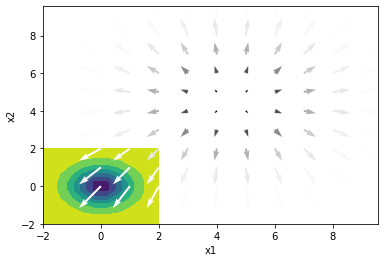

In [48]:
x1 = np.linspace(-2, 2, 10)
x2 = np.linspace(-2, 2, 10)
x1, x2 = np.meshgrid(x1, x2)

z = cone(x1, x2)

def diff_cone(x1, x2, on='x1'):
    if on == 'x1':
        return 2 * x1 * np.exp(-1 * (x1**2 + x2**2))
    return 2 * x2 * np.exp(-1 * (x1**2 + x2 ** 2))

u = diff_cone(x1, x2)
v = diff_cone(x1, x2, on='x2')

fig, ax = plt.subplots()
im = ax.contourf(x1, x2, z, cmap='gray')
plt.contourf(im)
plt.quiver(x1, x2, z, cmap='gray')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()